In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#Defining functions
def V(M, phis):
    return 0.5*M**2*phis**2

def Vdphi(M, phis):
    return M**2*phis

def H_func(omega, phis, M):
    return ((1./3.)*(omega**2/2+V(M,phis)))**.5

def cosmo(y, t,  M):
    phis, omega, A = y
    H = H_func(omega, phis, M)
    dydt = [omega, -3*H*omega -Vdphi(M, phis), H*A]
    return dydt



In [3]:
#Defining initial conditions and parameters
#G = 1
M = 7147e-9
#H = 1
M_pl = 1
#1/(8. * np.pi * G)**0.5
phi_init = 16
H_init = ((1./3.)*(V(M,phi_init)))**.5
omega_init = (-Vdphi(M, phi_init))/3*H_init**.5
A_init = 1
y0 = [phi_init, omega_init, A_init]
t = np.linspace(0, 1/H_init*250, 10000)
sol = odeint(lambda t, y: cosmo(t,y,M), y0, t)
phi_out = sol[:, 0]
omega_out = sol[:, 1]
A_out = sol[:,2]


t = np.linspace(0, 1/H_init*250, 10000)
phis = [-15, -1, -5, 5, 16]
soln_ts = []
soln_phis = []
soln_omegas = []
soln_As = []
for a in phis:
    phi_init = a
    omega_init = (-Vdphi(M, phi_init))/3*H_init
    A_init = 1
    y0 = [phi_init, omega_init, A_init]
    
    sol = odeint(lambda t, y: cosmo(t,y,M), y0, t)
    phi_out = sol[:, 0]
    omega_out = sol[:, 1]
    A_out = sol[:,2]
    
    soln_ts.append(t) #Doing this one for ease of plotting in one line later
    soln_phis.append(phi_out)
    soln_omegas.append(omega_out)
    soln_As.append(A_out)


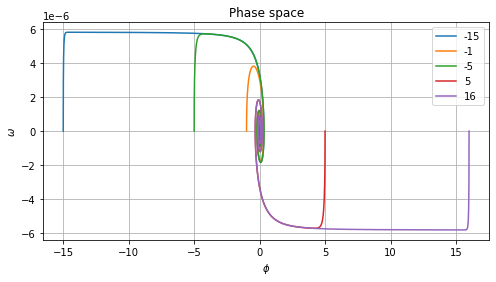

In [4]:
#Phase space
fig3, ax3 = plt.subplots(figsize=(8, 4))
for a in range(len(soln_phis)):
    ax3.plot(soln_phis[a], soln_omegas[a], label=phis[a])
ax3.grid()
ax3.set(xlabel=r'$\phi$', ylabel=r'$\omega$', title='Phase space')
ax3.legend()
    



[Text(0.5, 0, 't / H'),
 Text(0, 0.5, '$\\phi / M_{pl}$'),
 Text(0.5, 1.0, 'Evolution of the Scalar Field in Hubble Time')]

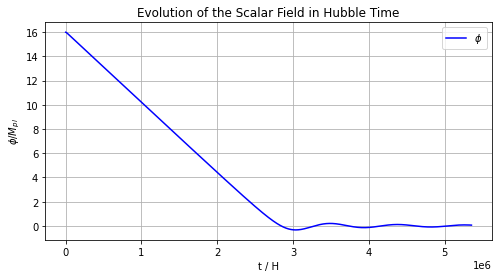

In [5]:
#Phi and Omega solutions
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, phi_out, 'b', label=r'$\phi$')
ax.legend()
ax.grid()
ax.set(xlabel='t / H', ylabel=r'$\phi / M_{pl}$', title='Evolution of the Scalar Field in Hubble Time')



[Text(0.5, 0, '$\\phi / M_{pl}$'),
 Text(0, 0.5, '$V(\\phi)$'),
 Text(0.5, 1.0, 'Scalar Potential against Scalar Field')]

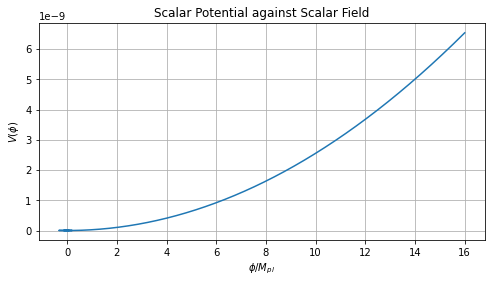

In [6]:
Vs = V(M, phi_out)
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(phi_out, Vs)
ax2.grid()
ax2.set(xlabel= r'$\phi / M_{pl}$', ylabel=r'$V(\phi)$', title='Scalar Potential against Scalar Field')

[Text(0.5, 0, '$\\phi$'),
 Text(0, 0.5, '$\\omega$'),
 Text(0.5, 1.0, 'Phase Space Dynamics')]

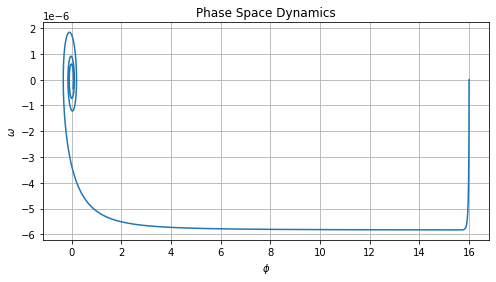

In [7]:
#Phase space
fig3, ax3 = plt.subplots(figsize=(8, 4))
ax3.plot(phi_out, omega_out)
ax3.grid()
ax3.set(xlabel=r'$\phi$', ylabel=r'$\omega$', title='Phase Space Dynamics')

[Text(0.5, 0, 't / H'),
 Text(0, 0.5, 'a(t)'),
 Text(0.5, 1.0, 'Evolution of the Scale Factor in Hubble Time')]

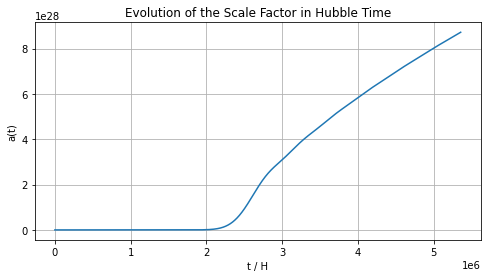

In [8]:
#a vs t
fig5, ax4 = plt.subplots(figsize=(8, 4))
Hs = H_func(M, omega_out, phi_out)
ax4.plot(t, A_out)
ax4.grid()
ax4.set(xlabel='t / H', ylabel='a(t)', title='Evolution of the Scale Factor in Hubble Time')